In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class Angle:
    def __init__(self, theta, phi):
        self.theta = theta
        self.phi = phi
        
def calc_coordinate(angle, radius):
    z = radius * np.cos(angle.theta)
    xy = radius * np.sin(angle.theta)
    x = xy * np.cos(angle.phi)
    y = xy * np.sin(angle.phi)
    return x, y, z

In [3]:
def calc_angle_dist(angle1, angle2):
    coord1 = calc_coordinate(angle1, 1.0)
    coord2 = calc_coordinate(angle2, 1.0)
    dx = coord1[0] - coord2[0]
    dy = coord1[1] - coord2[1]
    dz = coord1[2] - coord2[2]
    
    d1 = np.sqrt(coord1[0]**2 + coord1[1] **2 + coord1[2]**2)
    d2 = np.sqrt(coord2[0]**2 + coord2[1] **2 + coord2[2]**2)
    d3 = np.sqrt(dx**2 + dy**2 + dz**2)
    cos_dist = np.arccos((d1**2 + d2**2 - d3**2)/(2.0*d1*d2))
    return cos_dist

def gen_random_angles(count, theta_offset=0, phi_offset=0, theta_range=np.pi, phi_range=np.pi, multiplier=5):
    sz = multiplier * count + 1
    angles = []
    theta_list = np.random.uniform(0, theta_range, sz)
    phi_list = np.random.uniform(0, phi_range, sz)
    for theta, phi in zip(theta_list, phi_list):
        theta += theta_offset
        phi += phi_offset
        angles.append(Angle(theta, phi))
    return angles


def gen_poisson_disc_angles(count, theta_offset=0, phi_offset=0, theta_range=np.pi, phi_range=np.pi, multiplier=5, verbose=False):
    angles = []
    for i in range(count):
        candidates = gen_random_angles(i, theta_offset, phi_offset, theta_range, phi_range, multiplier)
        best_dist = 0
        best_angle = None
        for candidate in candidates:
            min_dist = sys.float_info.max
            for angle in angles:
                dist = calc_angle_dist(candidate, angle)
                if dist < min_dist:
                    min_dist = dist
            if min_dist > best_dist:
                best_dist = min_dist
                best_angle = candidate
        angles.append(best_angle)
        if verbose:
            print('.', end="")
    return angles
    

def gen_random_points(count, radius, theta_offset=0, phi_offset=0, multiplier=5, verbose=False):
    angles = gen_poisson_disc_angles(count, theta_offset, phi_offset, multiplier, verbose)
#     phi_range = -phi_offset, -phi_offset + np.pi
#     selected = []
#     for angle in angles:
#         if angle.phi >= phi_range[0] and angle.phi < phi_range[1]:
#             selected.append(angle)
    res = []
    for angle in angles:
        coord = calc_coordinate(angle, radius)
        res.append(coord)
    return res

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [5]:
%matplotlib notebook

In [106]:
points = gen_random_points(40, 2.5, phi_offset=-np.pi/2, multiplier=10, verbose=True)

........................................

<IPython.core.display.Javascript object>


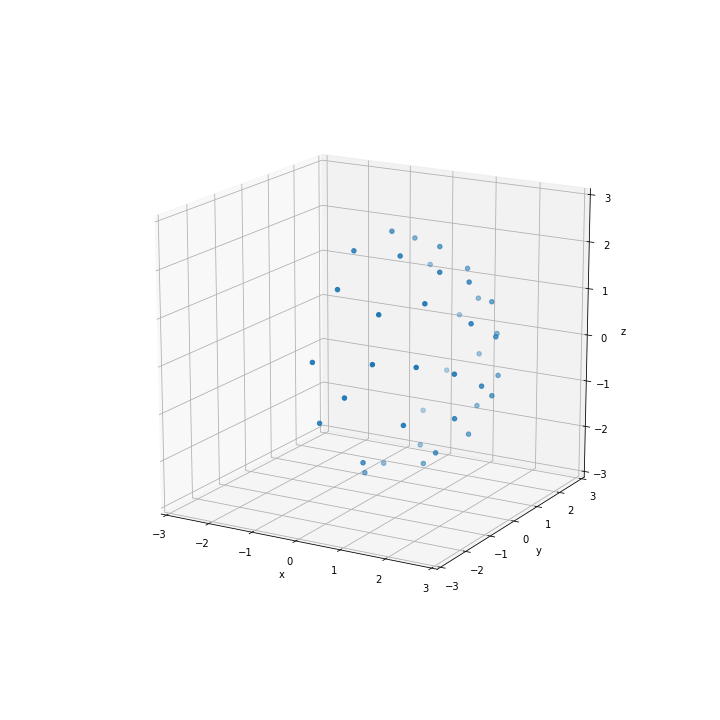

In [135]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
xs = [pt[0] for pt in points]
ys = [pt[1] for pt in points]
zs = [pt[2] for pt in points]
ax.scatter(xs, ys, zs)
ax.set_xlim(-3,3)
ax.set_xlabel('x')
ax.set_ylim(-3,3)
ax.set_ylabel('y')
ax.set_zlim(-3,3)
ax.set_zlabel('z')
plt.show()

In [6]:
angles = gen_poisson_disc_angles(100, phi_range=np.pi*2, multiplier=5, verbose=True)

....................................................................................................

In [7]:
os.getcwd()

'/home/chen/coding/projects/dnpsoup/py_scripts'

In [36]:
dest_dir = '../dnpsoup_analytics/outputs/CE/TEKPol'
if not os.path.exists(dest_dir):
    os.makedirs(dest_dir)
angles_dest = os.path.join(dest_dir, 'angles100.log')
print(angles_dest)
with open(angles_dest, 'w+', encoding='utf-8') as f:
    f.write('theta, phi\n')
    for angle in angles:
        f.write(f'{angle.theta}, {angle.phi}\n')
        print('.', end='')
print()

../dnpsoup_analytics/outputs/CE/TEKPol/angles100.log
....................................................................................................


<IPython.core.display.Javascript object>


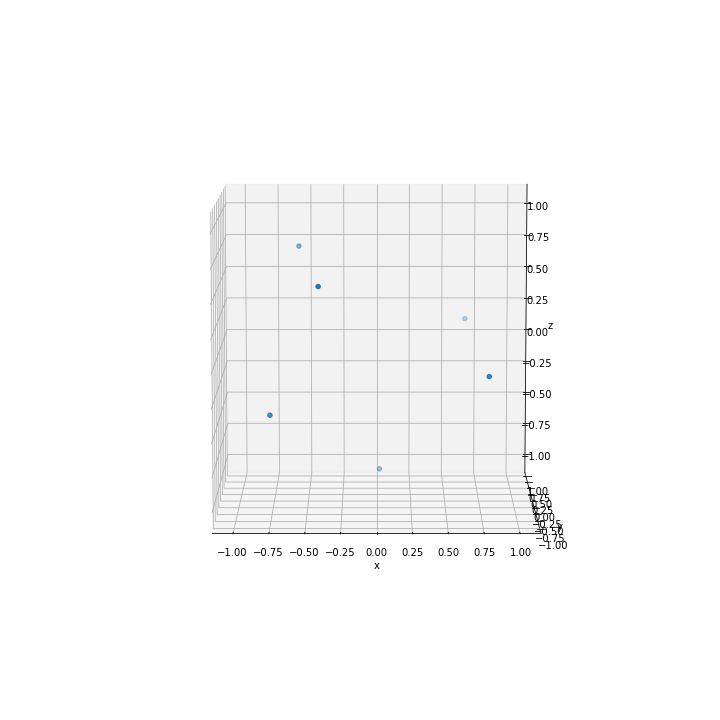

In [43]:
xs = []
ys = []
zs = []
cutoff = 6
for angle in angles[:cutoff]:
    coord = calc_coordinate(angle, 1.0)
    xs.append(coord[0])
    ys.append(coord[1])
    zs.append(coord[2])

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
lower_lim = -1.1
upper_lim = 1.1
ax.set_xlim(lower_lim, upper_lim)
ax.set_xlabel('x')
ax.set_ylim(lower_lim, upper_lim)
ax.set_ylabel('y')
ax.set_zlim(lower_lim, upper_lim)
ax.set_zlabel('z')
plt.show()

## Generate inputs for Custom Angles

In [10]:
import json
from copy import deepcopy

In [11]:
os.getcwd()

'/home/chen/coding/projects/dnpsoup/py_scripts'

In [179]:
orig_filepath = '../dnpsoup_analytics/inputs/CE/TEKPol/TEKPol_400MHz_8kHz_fp_custom_seed_inc40ns_simple_addition.json'
dest_filepath = '../dnpsoup_analytics/inputs/CE/TEKPol/TEKPol_400MHz_8kHz_fp_custom100_inc40ns_simple_addition.json'

In [182]:
with open(orig_filepath) as f:
    data = json.load(f)
print(json.dumps(data, indent=2))

{
  "spinsys": {
    "euler": {
      "alpha": 0,
      "beta": 0,
      "gamma": 0
    },
    "interactions": [
      {
        "name": "shielding",
        "id": 0,
        "entries": {
          "x": 2.0094,
          "y": 2.007,
          "z": 2.0024,
          "id": 0,
          "euler": {
            "alpha": 0,
            "beta": 0,
            "gamma": 0
          }
        }
      },
      {
        "name": "dipole",
        "id": 1,
        "entries": {
          "id1": 0,
          "id2": 1
        }
      },
      {
        "name": "csa",
        "id": 5,
        "entries": {
          "x": 0,
          "y": 0,
          "z": 0,
          "id": 3,
          "euler": {
            "alpha": 0,
            "beta": 0,
            "gamma": 0
          }
        }
      },
      {
        "name": "hyperfine",
        "id": 6,
        "entries": {
          "id1": 0,
          "id2": 3
        }
      },
      {
        "name": "csa",
        "id": 14,
        "entries": {
      

In [183]:
data["settings"]["eulers"] = []
for idx, angle in enumerate(angles):
    temp = {
        "alpha": angle.phi,
        "beta": angle.theta,
        "gamma": 0.0
    }
    data["settings"]["eulers"].append(temp)
with open(dest_filepath, 'w') as json_file:
    json.dump(data, json_file, indent=2)
print('finished.')

finished.


## Generate inputs for Box Model

In [12]:
import json
from copy import deepcopy

In [13]:
os.getcwd()

'/home/chen/coding/projects/dnpsoup/py_scripts'

In [28]:
orig_path = '../dnpsoup_analytics/inputs/CE/TEKPol/TEKPol_400MHz_8kHz_fp_ZCW34_inc50ns_box_seed_v2.json'
dest_dir = '../dnpsoup_analytics/inputs/CE/TEKPol/box_coords_ZCW34_v2'
# orig_path = '../dnpsoup_analytics/inputs/CE/AMUPol/AMUPol_14T_8kHz_fp_ZCW34_inc50ns_box_seed.json'
# dest_dir = '../dnpsoup_analytics/inputs/CE/AMUPol/box_coords_ZCW34_v1'

In [29]:
if not os.path.exists(dest_dir):
    os.makedirs(dest_dir)

with open(orig_path) as f:
    data = json.load(f)
print(json.dumps(data, indent=2))

{
  "spinsys": {
    "euler": {
      "alpha": 0,
      "beta": 0,
      "gamma": 0
    },
    "interactions": [
      {
        "name": "shielding",
        "id": 0,
        "entries": {
          "x": 2.0094,
          "y": 2.007,
          "z": 2.0024,
          "id": 0,
          "euler": {
            "alpha": 0,
            "beta": 0,
            "gamma": 0
          }
        }
      },
      {
        "name": "dipole",
        "id": 1,
        "entries": {
          "id1": 0,
          "id2": 1
        }
      },
      {
        "name": "csa",
        "id": 3,
        "entries": {
          "x": 0,
          "y": 0,
          "z": 0,
          "id": 3,
          "euler": {
            "alpha": 0,
            "beta": 0,
            "gamma": 0
          }
        }
      },
      {
        "name": "hyperfine",
        "id": 4,
        "entries": {
          "id1": 0,
          "id2": 3
        }
      },
      {
        "name": "csa",
        "id": 5,
        "entries": {
       

In [30]:
type(angles[0])

__main__.Angle

In [31]:
for idx, angle in enumerate(angles):
    temp = deepcopy(data)
    temp['settings']['euler']['alpha'] = float(angle.phi)
    temp['settings']['euler']['beta'] = float(angle.theta)
    temp['settings']['euler']['gamma'] = 0.0
    temp['settings']['Probe']['mas_increment'] = 5.0e-8
    
    new_filename = f'eeH_box_{idx:02d}.json'
    new_filepath = os.path.join(dest_dir, new_filename)
    with open(new_filepath, 'w') as json_file:
        json.dump(temp, json_file, indent=2)
        print('.', end='')
print()
print('finished.')

....................................................................................................
finished.


In [32]:
13735/3600

3.8152777777777778

## Generate inputs

In [108]:
import json
from copy import deepcopy

In [109]:
os.getcwd()

'/home/chen/coding/projects/dnpsoup/py_scripts'

In [110]:
orig_filepath = '../dnpsoup_analytics/inputs/CE/TEKPol/TEKPol_400MHz_8kHz_fp_ZCW55_inc40ns_H_seed.json'
dest_dir = '../dnpsoup_analytics/inputs/CE/TEKPol/H_coords_ZCW55'

In [116]:
if not os.path.exists(dest_dir):
    os.makedirs(dest_dir)

with open(orig_filepath) as f:
    data = json.load(f)
print(json.dumps(data, indent=2))

{
  "spinsys": {
    "euler": {
      "alpha": 0,
      "beta": 0,
      "gamma": 0
    },
    "interactions": [
      {
        "name": "shielding",
        "id": 0,
        "entries": {
          "x": 2.0094,
          "y": 2.007,
          "z": 2.0024,
          "id": 0,
          "euler": {
            "alpha": 0,
            "beta": 0,
            "gamma": 0
          }
        }
      },
      {
        "name": "dipole",
        "id": 1,
        "entries": {
          "id1": 0,
          "id2": 1
        }
      },
      {
        "name": "csa",
        "id": 2,
        "entries": {
          "x": 0,
          "y": 0,
          "z": 0,
          "id": 2,
          "euler": {
            "alpha": 0,
            "beta": 0,
            "gamma": 0
          }
        }
      },
      {
        "name": "hyperfine",
        "id": 3,
        "entries": {
          "id1": 0,
          "id2": 2
        }
      },
      {
        "name": "shielding",
        "id": 4,
        "entries": {
 

In [117]:
type(points[0][0])

numpy.float64

In [118]:
for idx, point in enumerate(points):
    temp = deepcopy(data)
    temp['spinsys']['spins']['2']['x'] = float(point[0])
    temp['spinsys']['spins']['2']['y'] = float(point[1])
    temp['spinsys']['spins']['2']['z'] = float(point[2])
    new_filename = f'eeH_{idx:02d}.json'
    new_filepath = os.path.join(dest_dir, new_filename)
    with open(new_filepath, 'w') as json_file:
        json.dump(temp, json_file, indent=2)
        print('.', end='')
print()
print('finished.')

........................................
finished.


<IPython.core.display.Javascript object>


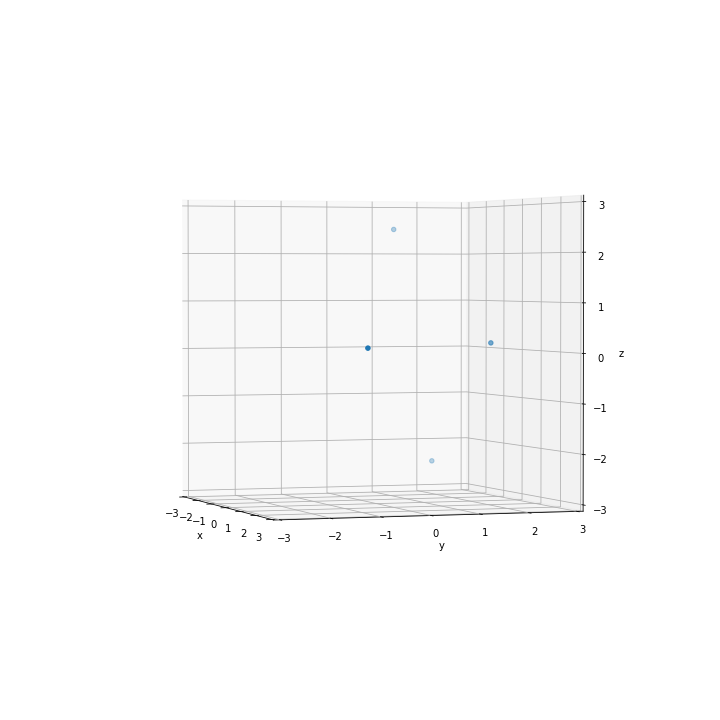

In [136]:
fig = plt.figure(figsize=(10,10))
cutoff = 4
ax = fig.add_subplot(111, projection='3d')
xs = [pt[0] for pt in points[:cutoff]]
ys = [pt[1] for pt in points[:cutoff]]
zs = [pt[2] for pt in points[:cutoff]]
ax.scatter(xs, ys, zs)
ax.set_xlim(-3,3)
ax.set_xlabel('x')
ax.set_ylim(-3,3)
ax.set_ylabel('y')
ax.set_zlim(-3,3)
ax.set_zlabel('z')
plt.show()